In [0]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import accuracy_score, mean_squared_error, log_loss
import matplotlib.colors
from tqdm import tqdm_notebook
import seaborn as sns
import imageio

## Feed forward 

In [0]:
def sigmoid(x):
  return 1/(1+np.exp(-x))

In [3]:
# non vectorized feed forward pass

# 1. Given the weights and label
x1 = np.random.rand()
x2 = np.random.rand()
y = np.random.randint(0,2)

# 2. Initialize the weights

# 2.1 Layer 1
w1 = np.random.rand()
w2 = np.random.rand()
w3 = np.random.rand()
w4 = np.random.rand()
b1 = np.random.rand()
b2 = np.random.rand()

# 2.2 Layer 2
w5 = np.random.rand()
w6 = np.random.rand()
b3 = np.random.rand()

# 3. compute the neurons

# 3.1 Layer 1
a1 = w1*x1+w2*x2+b1
h1 = sigmoid(a1)

a2 = w3*x1+w4*x2+b2
h2 = sigmoid(a1)

# 3.2 Layer 2
a3 = w5*h1+w6*h2+b3
h3 = sigmoid(a3)
h3,y,w1

(0.7965692314648343, 1, 0.8681652497742216)

## Updating the weight with backpropagation

1. considering loss function as mean squared error
2. updating only one weight w1
3. for that we need to find the derivative of the loss function with respect to the weight w1
4. The partial derivative of the loss with respect to w1 weight is - 

$$\Delta = \frac {\partial{Loss}}{\partial{w_1}} = \frac {\partial{(Loss=\sum_1^{n=1}\frac{1}{2}(y_i - h_3)^2)}}{\partial{h_3}}  \frac {\partial{(h_3 = sigmoid(a_3))}}{\partial{a_3}}  \frac {\partial{(a_3 = w_5.h_1 + w_6.h_2)}}{\partial{h_1}}  \frac {\partial{(h_1 = sigmoid(a_1))}}{\partial{a_1}}  \frac {\partial{(a_1 = w_1.x_1 + w_2.x_2)}}{\partial{w_1}}$$

which comes out to be - 

$$\frac {\partial{Loss}}{\partial{w_1}} = (h_3-y)\space(h_3(1-h_3))\space(w_5)\space(h_1(1-h_1))\space(x_1)$$

In [4]:
grad = (h3-y)*(h3*(1-h3))*(w5)*(h1*(1-h1))*(x1)

# after calculating the gradient update the weight parameter
epochs = 50
step = 1
for _ in range(epochs):
  w1 = w1-step*grad
  
w1

0.9993787408355432

## Real Data Example

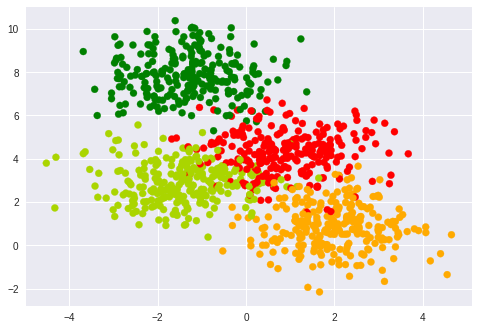

In [5]:
# Create data
from sklearn.datasets import make_blobs

data, labels = make_blobs(n_samples=1000, centers=4, n_features=2, random_state=0)
my_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["red","yellow","green"])
plt.scatter(data[:,0], data[:,1], c=labels, cmap=my_cmap)
plt.show()

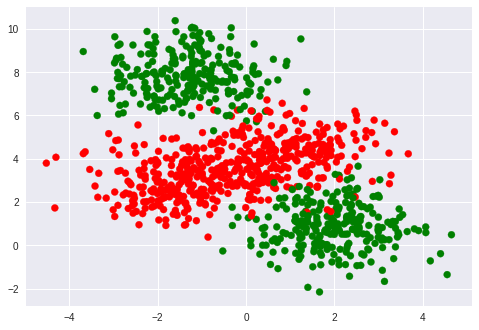

In [6]:
labels_orig = labels
labels = np.mod(labels_orig, 2)
plt.scatter(data[:,0], data[:,1], c=labels, cmap=my_cmap)
plt.show()

In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(data, labels, stratify=labels, random_state=0)
print(X_train.shape, X_test.shape)

(750, 2) (250, 2)


## My Neural Network Class

In [0]:
class MyNeuralNetwork:
  
  def __init__(self):
    np.random.seed(0)
    self.w1 = np.random.rand()
    self.w2 = np.random.rand()
    self.w3 = np.random.rand()
    self.w4 = np.random.rand()
    self.w5 = np.random.rand()
    self.w6 = np.random.rand()
    
    self.b1 = 0
    self.b2 = 0
    self.b3 = 0
    
  def sigmoid(self,x):
    return 1/(1+np.exp(-x))
  
  def forward_pass(self,x):
    self.x1,self.x2 = x
    
    # Layer 1
    # Neuron 1
    self.a1 = self.w1*self.x1 + self.w2*self.x2 + self.b1
    self.h1 = self.sigmoid(self.a1)
    # Neuron 2
    self.a2 = self.w3*self.x1 + self.w4*self.x2 + self.b2
    self.h2 = self.sigmoid(self.a2)
    
    # Layer 2
    self.a3 = self.w5*self.h1 + self.w6*self.h2 + self.b3
    self.h3 = self.sigmoid(self.a3)
   
    return self.h3
  
  def grad(self,x,y):
    
    self.forward_pass(x)
    
    # Backpropagation in  - 
    # 1. Neuron 1
    self.dw1 = (self.h3-y) * self.h3*(1-self.h3) * self.w5 * self.h1*(1-self.h1) * self.x1
    self.dw2 = (self.h3-y)*(self.h3*(1-self.h3))*(self.w5)*(self.h1*(1-self.h1))*(self.x2)
    self.db1 = (self.h3-y)*(self.h3*(1-self.h3))*(self.w5)*(self.h1*(1-self.h1))
    
    # 2. Neuron 2
    self.dw3 = (self.h3-y)*(self.h3*(1-self.h3))*(self.w6)*(self.h2*(1-self.h2))*(self.x1)
    self.dw4 = (self.h3-y)*(self.h3*(1-self.h3))*(self.w6)*(self.h2*(1-self.h2))*(self.x2)
    self.db2 = (self.h3-y)*(self.h3*(1-self.h3))*(self.w6)*(self.h2*(1-self.h2))
   
    # 3. Neuron 3
    self.dw5 = (self.h3-y)*(self.h3*(1-self.h3))*(self.h1)
    self.dw6 = (self.h3-y)*(self.h3*(1-self.h3))*(self.h2)
    self.db3 = (self.h3-y)*(self.h3*(1-self.h3))
    
  def predict(self,X):
    Y_pred = []
    for x in X:
      Y_pred.append(self.forward_pass(x))
    return np.array(Y_pred)
  
  def predict_h1(self,X):
    Y_pred = []
    for x in X:
      W = np.array([self.w1,self.w2]).reshape(-1,1)
      x = x.reshape(1,-1)
      prediction = np.dot(x,W) + self.b1
      Y_pred.append(prediction)
    return np.array(Y_pred)
  
  def predict_h2(self,X):
    Y_pred = []
    for x in X:
      W = np.array([self.w3,self.w4]).reshape(-1,1)
      x = x.reshape(1,-1)
      prediction = np.dot(x,W) + self.b2
      Y_pred.append(prediction)
    return np.array(Y_pred)
  
  def fit(self, X,Y, epochs = 1,learning_rate = 1, initialise=True,display_loss=False):
    
    if initialise:
      np.random.seed(0)
      self.w1 = np.random.randn()
      self.w2 = np.random.randn()
      self.w3 = np.random.randn()
      self.w4 = np.random.randn()
      self.w5 = np.random.randn()
      self.w6 = np.random.randn()
      self.b1 = 0
      self.b2 = 0
      self.b3 = 0
      
    if display_loss:
      loss = {}
      
    self.weights = {}
        
    for i in tqdm_notebook(range(epochs),total=epochs,unit='Epoch'):
      
      # initialise the grads to zero
      dw1,dw2,dw3,dw4,dw5,dw6,db1,db2,db3 = [0]*9
      # then compute the grad for given weigths and input and update the grad as per the loss value
      for x,y in zip(X,Y):
        # first calculate the grad for each x,y value
        self.grad(x,y)
        # storing it in an external value
        dw1 += self.dw1
        dw2 += self.dw2
        dw3 += self.dw3
        dw4 += self.dw4
        dw5 += self.dw5
        dw6 += self.dw6
        db1 += self.db1
        db2 += self.db2
        db3 += self.db3
      
      # now update the weight based on the average grad value all over the x values
      m = X.shape[0]
      self.w1 -= learning_rate*dw1/m
      self.w2 -= learning_rate*dw2/m
      self.w3 -= learning_rate*dw3/m
      self.w4 -= learning_rate*dw4/m
      self.w5 -= learning_rate*dw5/m
      self.w6 -= learning_rate*dw6/m
      
      self.b1 -= learning_rate*db1/m
      self.b2 -= learning_rate*db2/m
      self.b3 -= learning_rate*db3/m
      
      Y_pred = self.predict(X)
    
      if display_loss:
        Y_pred = self.predict(X)
        loss[i] = log_loss(Y,Y_pred)
      
      # store the weigths on every iterations
      layer1 = [0,0,self.w5, self.w6,self.b3,0]
      layer2 = [self.w1, self.w2, self.w3, self.w4, self.b1, self.b2]
      a = np.vstack((layer1,layer2))
      self.weights[i] = a
        
            
    if display_loss:
      plt.plot(loss.values())
      plt.xlabel('Epochs')
      plt.ylabel('Mean Squared Error Loss')
      plt.show()


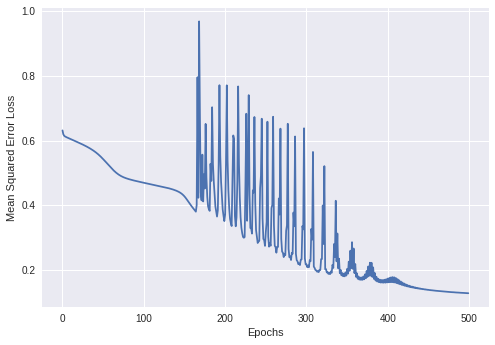

In [9]:
NN = MyNeuralNetwork()
epochs = 500
NN.fit(X_train, Y_train, epochs = epochs,learning_rate = 5, initialise=True,display_loss=True)

In [10]:
Y_predict = NN.predict(X_train)
Y_predict_binarised = (Y_predict>=0.5).astype(np.int)
print('Train accuracy',accuracy_score(Y_predict_binarised,Y_train))

Y_predict_test = NN.predict(X_test)
Y_predict_binarised_test = (Y_predict_test>=0.5).astype(np.int)
print('Test accuracy',accuracy_score(Y_predict_binarised_test,Y_test))

Train accuracy 0.9733333333333334
Test accuracy 0.94


## Visualizing the Learning of neural networks

In [11]:
W = NN.weights

def sigmoid(x):
    return 1/(1+np.exp(-x))
  
def predict(weights,X):
  x1,x2 = X
  w5 = weights[0][2]
  w6 = weights[0][3]
  b3 = weights[0][4]
  
  w1 = weights[1][0]
  w2 = weights[1][1]
  w3 = weights[1][2]
  w4 = weights[1][3]
  b1 = weights[1][4]
  b2 = weights[1][5]
  
  # FORWARD PASS
  # neuron 1
  a1 = w1*x1 + w2*x2 + b1
  h1 = sigmoid(a1)
  # neuron 2
  a2 = w3*x1 + w4*x2 + b2
  h2 = sigmoid(a2)
    
  # Layer 2
  a3 = w5*h1 + w6*h2 + b3
  h3 = sigmoid(a3)
  
  return h1,h2,h3


# make the contour plots for every epochs
outputs = []
neuron1_preds = []
neuron2_preds = []

x1 = np.linspace(min(data[:,0]), max(data[:,0]),100)
x2 = np.linspace(min(data[:,1]), max(data[:,1]),100)
X1,X2 = np.meshgrid(x1,x2)

for w in tqdm_notebook(W.values(),unit='epochs',total=epochs):
  output = np.zeros(X1.shape)
  neuron1 = np.zeros(X1.shape)
  neuron2 = np.zeros(X1.shape)

  for i in range(len(x1)):
    for j in range(len(x2)):
      value = x1[i],x2[j]
      h1,h2,h3 = predict(w,value)
   
      neuron1[j,i] = (h1>=0.5).astype(np.int)
      neuron2[j,i] = (h2>=0.5).astype(np.int)
      output[j,i] = (h3>=0.5).astype(np.int)
      
      
  outputs.append(output)
  neuron1_preds.append(neuron1)
  neuron2_preds.append(neuron2)

In [12]:
def plot_heat_map(epoch):
    fig = plt.figure(figsize=(10, 2))
    
    ## plot the contour    
    fig = plt.figure()
    fig.set_size_inches(30,10)
    fig.suptitle('Epoch: '+str(epoch),fontsize=20)

    ax1 = plt.subplot(1,3,3)
    ax1.contourf(X1,X2,outputs[epoch],cmap=my_cmap,alpha=0.3)
    ax1.scatter(data[:,0], data[:,1], c=labels, cmap=my_cmap)
    ax1.set_title('Ouput')

    ax2 = plt.subplot(1,3,1)
    ax2.contourf(X1,X2,neuron1_preds[epoch],cmap=my_cmap,alpha=0.3)
    ax2.scatter(data[:,0], data[:,1], c=labels, cmap=my_cmap)
    ax2.set_title('Prediction by Neuron 1')

    ax3 = plt.subplot(1,3,2)
    ax3.contourf(X1,X2,neuron2_preds[epoch],cmap=my_cmap,alpha=0.3)
    ax3.scatter(data[:,0], data[:,1], c=labels, cmap=my_cmap)
    ax3.set_title('Prediction by Neuron 2')
  
    fig.canvas.draw()
    image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
    image = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))

    return image
  
  
img = imageio.mimsave('./weights_viz.gif', [plot_heat_map(i) for i in range(0,epochs,epochs//10)], fps=1)

Output hidden; open in https://colab.research.google.com to view.

## Visualizing the Weights

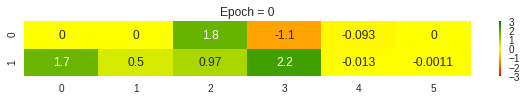

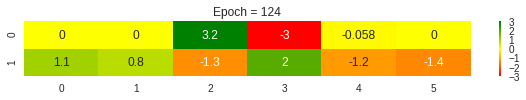

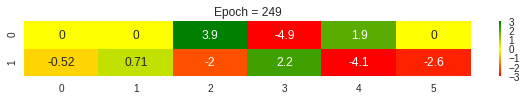

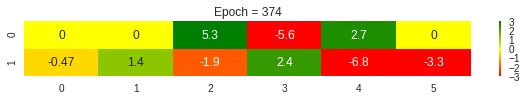

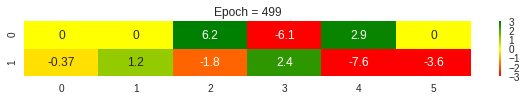

In [13]:
# plot the weigths 
values = np.linspace(0,epochs-1,5).astype(int)

for i in values:
  plt.figure(figsize=(10,1))
  plt.title("Epoch = "+str(i))
  sns.heatmap(NN.weights[i],cmap=my_cmap,annot=True,vmin=-3,vmax=3)
  plt.show()

## Multiclass Classification Neural Network Class

In [0]:
class MulitClassNN:
  def __init__(self):
    np.random.seed(0)
    self.w1 = np.random.rand()
    self.w2 = np.random.rand()
    self.w3 = np.random.rand()
    self.w4 = np.random.rand()
    self.w5 = np.random.rand()
    self.w6 = np.random.rand()
    self.w7 = np.random.rand()
    self.w8 = np.random.rand()
    self.w9 = np.random.rand()
    self.w10 = np.random.rand()
    self.w11 = np.random.rand()
    self.w12 = np.random.rand()
    
    self.b1 = 0
    self.b2 = 0
    self.b3 = 0
    self.b4 = 0
    self.b5 = 0
    self.b6 = 0
    
  def sigmoid(self,x):
    return 1/(1+np.exp(-x))
  
  def forward_pass(self,x):
    self.x1,self.x2 = x
    
    # forward pass to layer 1
    self.a1 = self.w1*self.x1 + self.w2*self.x2 + self.b1
    self.h1 = self.sigmoid(self.a1)
    
    self.a2 = self.w3*self.x1 + self.w4*self.x2 + self.b2
    self.h2 = self.sigmoid(self.a2)
    
    # forward pass to layer 2
    self.a3 = self.w5*self.h1 + self.w6*self.h2 + self.b3
    self.a4 = self.w7*self.h1 + self.w8*self.h2 + self.b4
    self.a5 = self.w9*self.h1 + self.w10*self.h2 + self.b5
    self.a6 = self.w11*self.h1 + self.w12*self.h2 + self.b6
            
    # softmax function to predict the probability distribution
    sum_exp = np.exp(self.a3) + np.exp(self.a4) + np.exp(self.a5) + np.exp(self.a6)
    self.h3 = np.exp(self.a3)/sum_exp
    self.h4 = np.exp(self.a4)/sum_exp
    self.h5 = np.exp(self.a5)/sum_exp
    self.h6 = np.exp(self.a6)/sum_exp
    
    return np.array([self.h3,self.h4,self.h5,self.h6])
    
  def grad(self,x,y):
    
    self.forward_pass(x)
    self.y1, self.y2,self.y3,self.y4 = y
    
    # backpropagation from loss to output layer
    self.dw5 = (self.h3-self.y1)*self.h1
    self.dw6 = (self.h3-self.y1)*self.h2
    self.db3 = (self.h3-self.y1)
    
    self.dw7 = (self.h4-self.y2)*self.h1
    self.dw8 = (self.h4-self.y2)*self.h2
    self.db4 = (self.h4-self.y2)
    
    self.dw9 = (self.h5-self.y3)*self.h1
    self.dw10 = (self.h5-self.y3)*self.h2
    self.db5 = (self.h5-self.y3)
    
    self.dw11 = (self.h6-self.y4)*self.h1
    self.dw12 = (self.h6-self.y4)*self.h2
    self.db6 = (self.h6-self.y4)
    
    # backpropagation from loss to input layer
    self.dh1 = (self.h3-self.y1)*self.w5 + (self.h4-self.y2)*self.w7 + (self.h5-self.y3)*self.w9 + (self.h6-self.y4)*self.w11
    self.dw1 = self.dh1*(self.h1*(1-self.h1))*self.x1
    self.dw2 = self.dh1*(self.h1*(1-self.h1))*self.x2
    self.db1 = self.dh1*(self.h1*(1-self.h1))
   
    self.dh2 = (self.h3-self.y1)*self.w6 + (self.h4-self.y2)*self.w8 + (self.h5-self.y3)*self.w10 + (self.h6-self.y4)*self.w12
    self.dw3 = self.dh2*(self.h2*(1-self.h2))*self.x1
    self.dw4 = self.dh2*(self.h2*(1-self.h2))*self.x2
    self.db2 = self.dh2*(self.h2*(1-self.h2))
    
  def predict(self,X):
    Y_pred = []
    for x in X:
      Y_pred.append(self.forward_pass(x))
    return np.array(Y_pred)
     
  def fit(self,X,Y,epochs=1,learning_rate=1,display_loss=False,display_weight=False):
    
    if display_loss:
      loss = {}
      
    for i in tqdm_notebook(range(epochs),unit='Epoch',total=epochs):
      dw1, dw2, dw3, dw4, dw5, dw6, dw7, dw8, dw9, dw10, dw11, dw12, db1, db2, db3, db4, db5, db6  = [0]*18
      # iterating over all the data set 
      # calculating the grad for each dataset and summing it up in one variable
      for x,y in zip(X,Y):
        self.grad(x,y)
        dw1 += self.dw1
        dw2 += self.dw2
        dw3 += self.dw3
        dw4 += self.dw4
        dw5 += self.dw5
        dw6 += self.dw6
        dw7 += self.dw7
        dw8 += self.dw8
        dw9 += self.dw9
        dw10 += self.dw10
        dw11 += self.dw11
        dw12 += self.dw12
        
        db1 += self.db1
        db2 += self.db2
        db3 += self.db3
        db4 += self.db4
        db5 += self.db5
        db6 += self.db6
        
        
      # averaging out the each grad 
      m = X.shape[0]
      # updating the weights and biases
      self.w1 -= learning_rate*dw1/m
      self.w2 -= learning_rate*dw2/m
      self.w3 -= learning_rate*dw3/m
      self.w4 -= learning_rate*dw4/m
      self.w5 -= learning_rate*dw5/m
      self.w6 -= learning_rate*dw6/m
      self.w7 -= learning_rate*dw7/m
      self.w8 -= learning_rate*dw8/m
      self.w9 -= learning_rate*dw9/m
      self.w10 -= learning_rate*dw10/m
      self.w11 -= learning_rate*dw11/m
      self.w12 -= learning_rate*dw12/m
      self.b1 -= learning_rate*db1/m
      self.b2 -= learning_rate*db2/m
      self.b3 -= learning_rate*db3/m
      self.b4 -= learning_rate*db4/m
      self.b5 -= learning_rate*db5/m
      self.b6 -= learning_rate*db6/m
      
      # updating has been done 
      # now display the loss 
      if display_loss:
        Y_pred = self.predict(X)
        loss[i] = log_loss(np.argmax(Y, axis=1), Y_pred)
      
      if display_weight:
        weight_matrix = np.array([[self.b3, self.w5, self.w6, 
                                 self.b4, self.w7, self.w8, 
                                 self.b5, self.w9, self.w10, 
                                 self.b6, self.w11, self.w12], 
                                [0, 0, 0,
                                 self.b1, self.w1, self.w2,
                                 self.b2, self.w3, self.w4, 
                                 0, 0, 0]])
        weight_matrices[i] = weight_matrix
      
      ## end of epochs ##
      
    if display_loss:
      plt.plot(loss.values())
      plt.title('Epochs vs Loss')
      plt.xlabel('Epochs')
      plt.ylabel('Cross Entropy Loss')
      

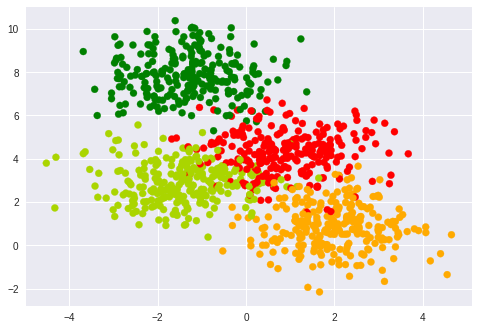

In [15]:
from sklearn.datasets import make_blobs

data, labels = make_blobs(n_samples=1000, centers=4, n_features=2, random_state=0)
my_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["red","yellow","green"])
plt.scatter(data[:,0], data[:,1], c=labels, cmap=my_cmap)
plt.show()

In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(data, labels, stratify=labels, random_state=0)
print(X_train.shape, X_test.shape)

(750, 2) (250, 2)


In [17]:
# one hot encoding of the labels since the labels are of 4 types
encoder = OneHotEncoder()
Y_train_encoded = encoder.fit_transform(Y_train.reshape(-1,1)).toarray()
Y_test_encoded = encoder.transform(Y_test.reshape(-1,1))
Y_train_encoded.shape, Y_test_encoded.shape

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


((750, 4), (250, 4))

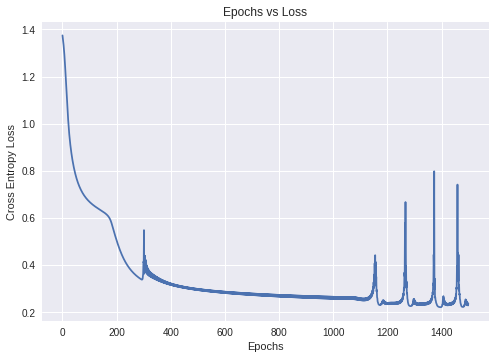

In [18]:
weight_matrices = {}
MultiNN = MulitClassNN()
MultiNN.fit(X_train,Y_train_encoded,display_loss=True,epochs=1500,learning_rate=1,display_weight=True)

In [19]:
# Evaluation 
Y_pred_train = MultiNN.predict(X_train)
Y_pred_train_label = np.argmax(Y_pred_train,axis=1)

Y_pred_test = MultiNN.predict(X_test)
Y_pred_test_label = np.argmax(Y_pred_test,axis=1)

print('Accuracy score on training example: ',accuracy_score(Y_pred_train_label,Y_train))
print('Accuracy score on training example: ',accuracy_score(Y_pred_test_label,Y_test))

Accuracy score on training example:  0.9066666666666666
Accuracy score on training example:  0.912


## Visualizing the classification done by the model

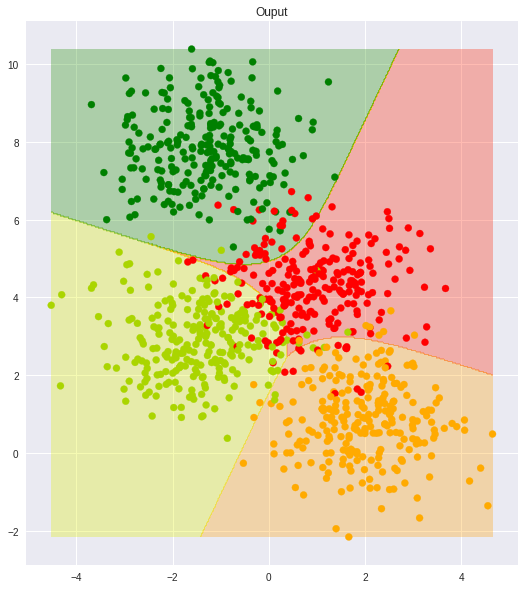

In [20]:
x1 = np.linspace(min(data[:,0]), max(data[:,0]),500)
x2 = np.linspace(min(data[:,1]), max(data[:,1]),400)

X1,X2 = np.meshgrid(x1,x2)

output = np.zeros(X1.shape)

for i in range(len(x1)):
  for j in range(len(x2)):
    value = np.array([x1[i],x2[j]]).reshape(1,-1)
    prediction = MultiNN.predict(value)   
    output[j,i] = np.argmax(prediction)
   

## plot the contour    
fig = plt.figure()
fig.set_size_inches(30,10)

ax1 = plt.subplot(1,3,1)
ax1.contourf(X1,X2,output,cmap=my_cmap,alpha=0.3)
ax1.scatter(data[:,0], data[:,1], c=labels, cmap=my_cmap)
ax1.set_title('Ouput')

plt.show()

In [21]:
len(weight_matrices)

1500

/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


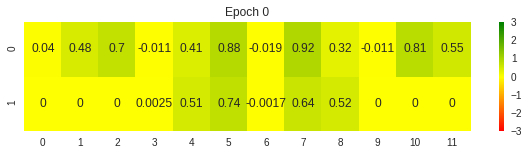

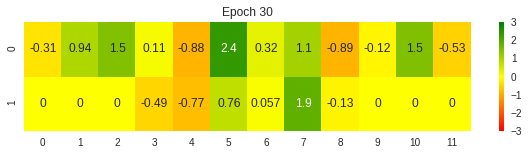

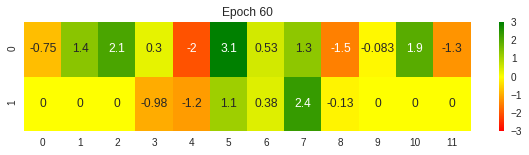

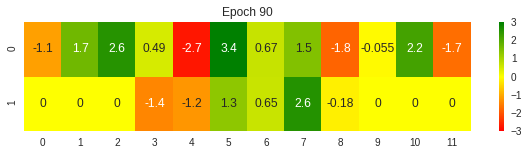

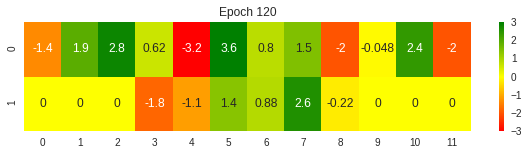

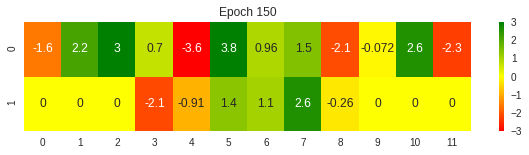

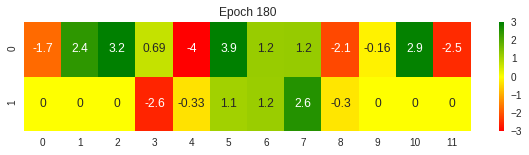

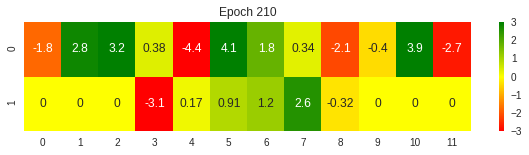

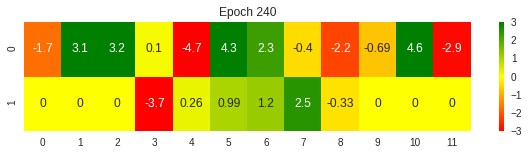

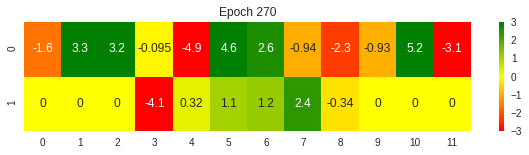

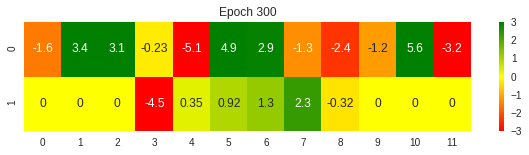

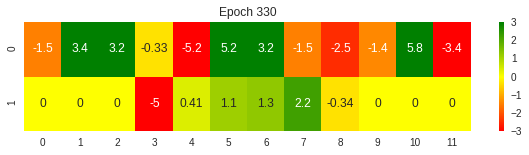

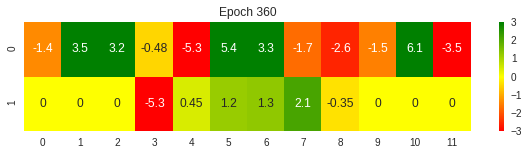

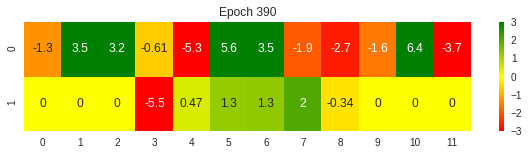

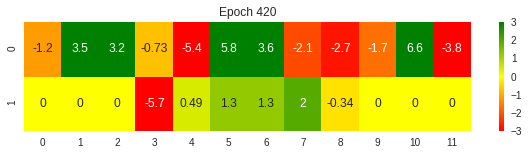

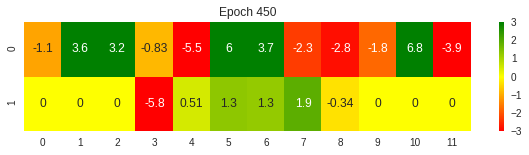

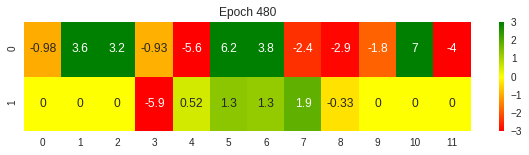

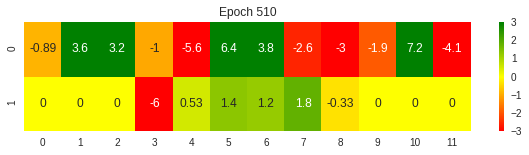

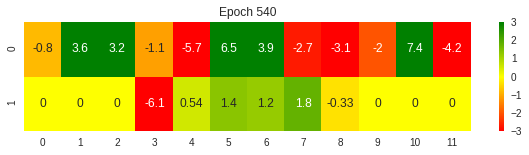

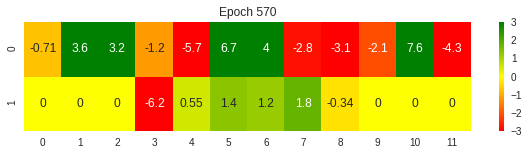

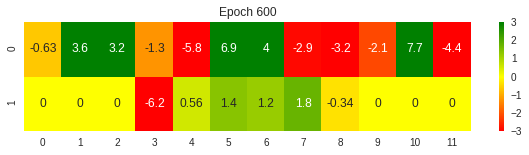

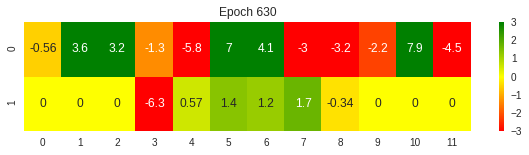

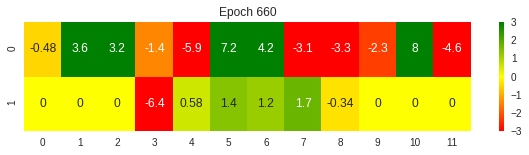

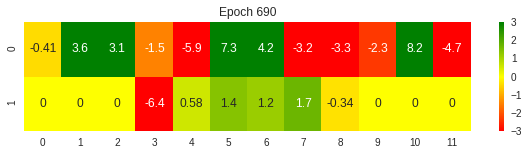

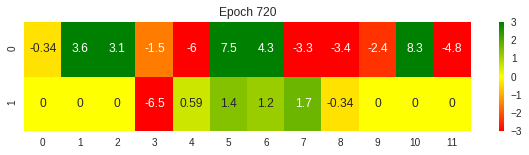

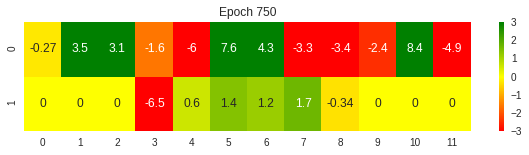

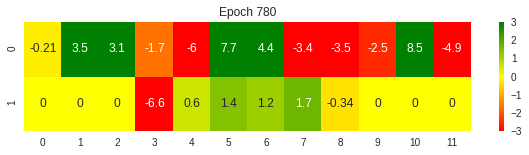

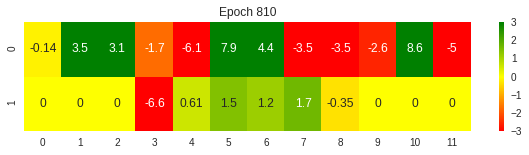

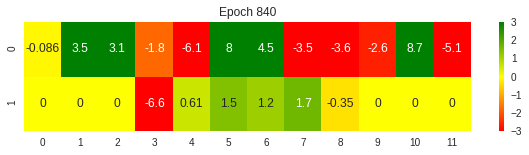

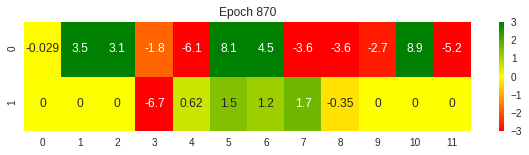

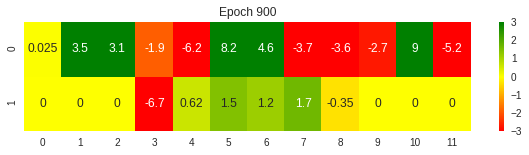

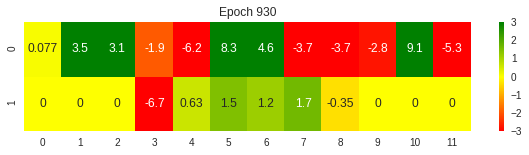

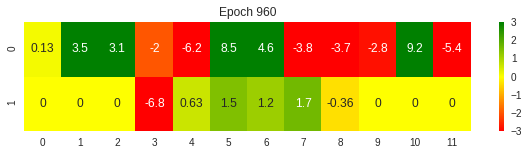

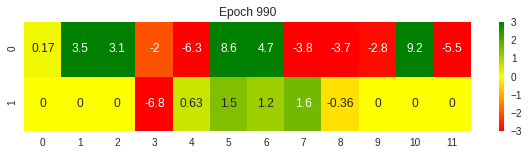

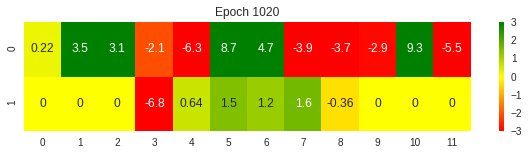

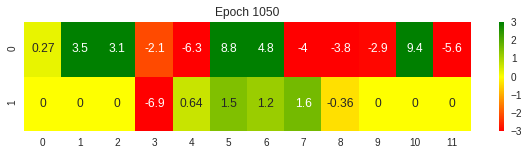

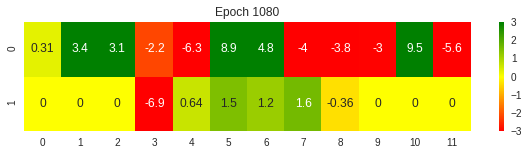

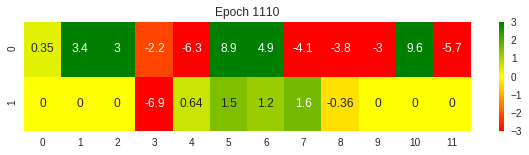

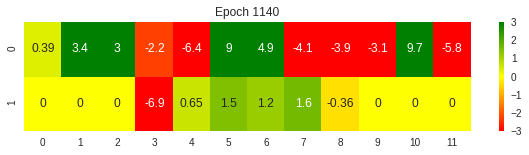

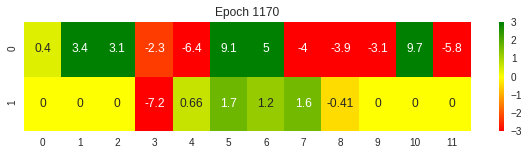

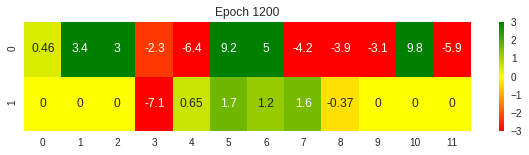

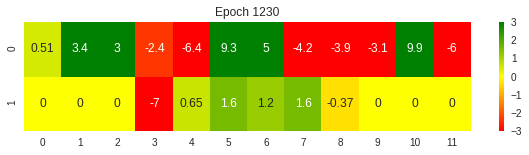

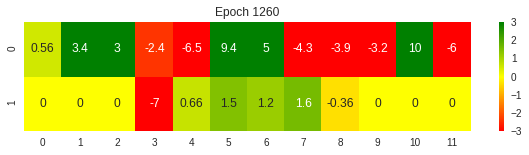

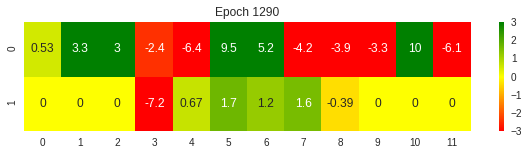

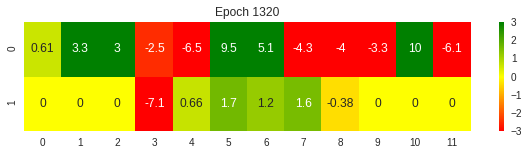

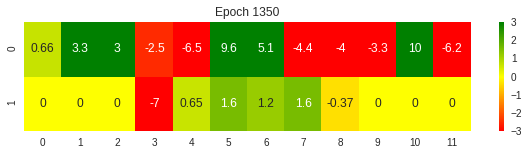

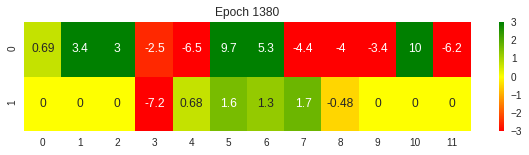

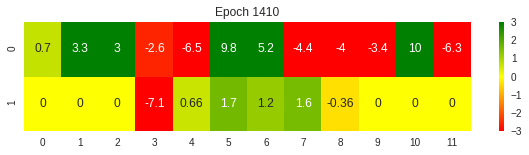

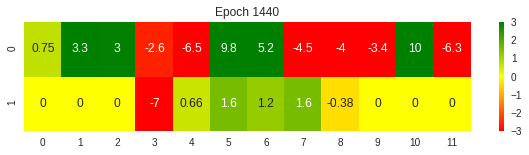

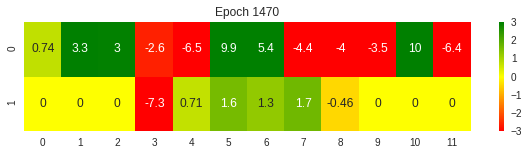

In [22]:
def plot_heat_map(epoch):
    fig = plt.figure(figsize=(10, 2))
    sns.heatmap(weight_matrices[epoch], annot=True, cmap=my_cmap, vmin=-3, vmax=3)
    plt.title("Epoch "+str(epoch))

    fig.canvas.draw()
    image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
    image = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))

    return image
  
  
img = imageio.mimsave('./weights_viz_multi.gif', [plot_heat_map(i) for i in range(0,len(weight_matrices),len(weight_matrices)//50)], fps=1)

## Scalar Neural Network